## 0. Support Vector Machine Overview

Support Vector Machine or SVM is a classification algorithm. It finds some separator or boundary by mapping the data set into a high dimensional feature space. The advantage here is that the data need not be to linear.

In a simple example, we can imagine having a vector of values [1, 2, 3, 4]. These data are not separable by some boundary, but we can pass them into some function and transform their values. The transformation of values by some function is known as kernelling. For example, we pass each value through $f(x) = x^2$. This returns two dimensional data - the original vector values and the squared values. Once we do this, we can then identify a plane that separates the classes of data. 

SVMs will operate in higher dimensions and identify a hyperplane defined by its own function which categorizes the data into two classes. The optimal hyperplane maximizes the margin or the separation between the two classes. This can be measured by using the points closest to the hyperplane which are referred to as the support vectors. Intuitively, these are the only points that really matter when computing the maximum margin. Points above this hyperplane belong to one class, and points below the hyperplane belong to the other class. 

Advantages:
- Accurate in high dimensional spaces
- Memory efficient because they only use a subset of the data to identify the hyperplane - the support vectors

Disadvantages:
- Prone to overfiting if the number of features is much greater than the number of samples
- They don't provide any probability estimates which is typically desirable
- Tend to be less efficient when data is greater than 1000 rows

## 1. Import libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score

## 2. Load in explore and clean data

In [2]:
df = pd.read_csv('/Users/danielchen/Desktop/GitHub/coursera-machine-learning/Data/cell_samples.csv')

We'll visualize the data to check for linearity since SVMs are a good option when data is non-linear.

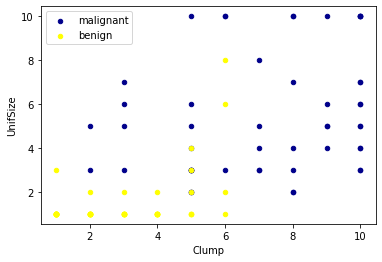

In [3]:
ax = df[df['Class'] == 4][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='DarkBlue', label='malignant')
df[df['Class'] == 2][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='Yellow', label='benign', ax=ax)
plt.show()

We can see that from the plot above, the data cannot be separated by some linear decision boundary or hyperplane, so we won't opt for logistic regression, and we'll continue with SVM.

Before moving forward with SVM, we'll need to ensure that our data is numeric, otherwise `sklearn` will error out.

In [4]:
df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

Since the `BareNuc` column contains some non-numeric observations, we'll drop those from the data, and recheck our data types.

In [5]:
df = df[df[['BareNuc']].apply(lambda x: x[0].isdigit(), axis=1)]
df['BareNuc'] = df['BareNuc'].astype('int')
df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

## 3. Fit the model and make predictions

We'd like to predict the class of tumor - either benign or malignant. We'll use the rest of the data as our predictors (with the exception of the column that serves as the unique identifier for each patient).

In [7]:
y = np.asarray(df['Class'])
X = df.drop(['ID', 'Class'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [8]:
rbf_svm = svm.SVC(kernel='rbf')
rbf_svm.fit(X_train, y_train)

SVC()

In [ ]:
y_hat = rbf_svm.predict(y_train)

## 4. Model Evaluation

We'll look at the confusion matrix to see the number of classes that were predicted correctly and incorrectly for each unique class.

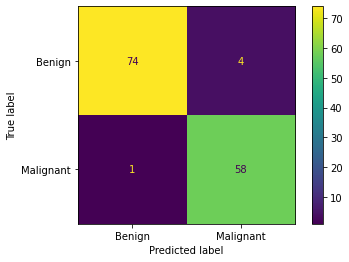

In [18]:
cm = confusion_matrix(y_true=y_test, y_pred=y_hat, labels=[2, 4])
cmd = ConfusionMatrixDisplay(cm, display_labels=['Benign', 'Malignant'])
cmd.plot()


To evaluate our model, we'll look at the f1 score which takes into account both the precision and recall of our classifier.

In [21]:
f1_score(y_true=y_test, y_pred=y_hat, average='weighted')

0.9635982763739507

## 5. Identify the optimal kernel

As a reminder, our data needs to be transformed into a higher dimension space first before the hyper plane can be identified. The transformation is done by some function which is also known as kernling. `sklearn` provides default options for the kernel we'd like to use. Below, we iterate over those available options and store their corresponding f1 scores to a list which can then be used to identify the optimal kernel. Here we'd like to choose the kernel associated with the greatest f1 score.

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
scores = []
kernel_types = []
for kernel in kernels:
    svm_instance = svm.SVC(kernel=kernel)
    svm_instance.fit(X_train, y_train)
    y_hat = svm_instance.predict(X_test)

    score = f1_score(y_true=y_test, y_pred=y_hat, average='weighted')
    scores.append(score)

    kernel_type = kernel
    kernel_types.append(kernel_type)

test_results = pd.DataFrame({'kernel': kernel_types, 'f1score': scores})

Identify the kernel associated with the highest f1 score

In [58]:
test_results[test_results['f1score'] == max(test_results['f1score'])]['kernel'].values[0] 

'rbf'

Our original rbf kernel function returned the greatest f1 score.